In [ ]:
import sqlite3 as db
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
conn = db.connect('/content/drive/MyDrive/olist.db')

In [ ]:
df_customers = pd.read_sql_query (
"""
SELECT * FROM sqlite_master 
WHERE type IN ("table", "view");
"""
,conn)
df_customers

,type,name,tbl_name,rootpage,sql
0,table,olist_order_customer_dataset,olist_order_customer_dataset,2,"CREATE TABLE ""olist_order_customer_dataset"" (\..."
1,table,olist_order_dataset,olist_order_dataset,2644,"CREATE TABLE ""olist_order_dataset"" (\n""index"" ..."
2,table,olist_order_reviews_dataset,olist_order_reviews_dataset,7660,"CREATE TABLE ""olist_order_reviews_dataset"" (\n..."
3,table,olist_order_payments_dataset,olist_order_payments_dataset,11735,"CREATE TABLE ""olist_order_payments_dataset"" (\..."
4,table,olist_order_items_dataset,olist_order_items_dataset,13754,"CREATE TABLE ""olist_order_items_dataset"" (\n""i..."
5,table,olist_products_dataset,olist_products_dataset,18289,"CREATE TABLE ""olist_products_dataset"" (\n""inde..."
6,table,olist_sellers_dataset,olist_sellers_dataset,18983,"CREATE TABLE ""olist_sellers_dataset"" (\n""index..."
7,table,olist_geolocation_dataset,olist_geolocation_dataset,19040,"CREATE TABLE ""olist_geolocation_dataset"" (\n""i..."
8,table,product_category_name_translation,product_category_name_translation,33966,"CREATE TABLE ""product_category_name_translatio..."


In [ ]:
products = pd.read_sql_query (
"""
SELECT * FROM olist_products_dataset;
"""
,conn)
products.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
order_customer = pd.read_sql_query (
"""
SELECT * FROM olist_order_customer_dataset;
"""
,conn)
order_customer.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
order_payments = pd.read_sql_query (
"""
SELECT * FROM olist_order_payments_dataset;
"""
,conn)
order_payments.head()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [ ]:
order_items = pd.read_sql_query (
"""
SELECT * FROM olist_order_items_dataset;
"""
,conn)
order_items.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
sellers = pd.read_sql_query (
"""
SELECT * FROM olist_sellers_dataset;
"""
,conn)
sellers.head()

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
df_geolocation = pd.read_sql_query (
"""
SELECT * FROM olist_geolocation_dataset;
"""
,conn)
df_geolocation.head()

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
product_category = pd.read_sql_query (
"""
SELECT * FROM product_category_name_translation;
"""
,conn)
product_category.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [ ]:
order_reviews = pd.read_sql_query (
"""
SELECT * FROM olist_order_reviews_dataset;
"""
,conn)
order_reviews.head()

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
df_order = pd.read_sql_query (
"""
SELECT * FROM olist_order_dataset;
"""
,conn)
df_order.dtypes

index                             int64
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [ ]:
products.isna().sum()

index                           0
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
products.dtypes

index                           int64
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [ ]:
"""
Kategorik = product_id, product_category_name
numerik = product_name_lenght, des_lenght, photos_qty, weight_g, length_cm, height_cm, width_cm
"""

'\nKategorik = product_id, product_category_name\nnumerik = product_name_lenght, des_lenght, photos_qty, weight_g, length_cm, height_cm, width_cm\n'

In [ ]:
products.head()


,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,32951.0,NaN,NaN,NaN,16475.0,9512.278697,0.0,8237.5,16475.0,24712.5,32950.0
product_id,32951,32951,1e9e8ef04dbcff4541ed26657ea517e5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_name,32341,73,cama_mesa_banho,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name_lenght,32341.0,NaN,NaN,NaN,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32341.0,NaN,NaN,NaN,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32341.0,NaN,NaN,NaN,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0
product_weight_g,32949.0,NaN,NaN,NaN,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,NaN,NaN,NaN,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,NaN,NaN,NaN,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,NaN,NaN,NaN,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


In [ ]:
'''
Pertanyaan:
1. Produk yang paling banyak diminati (dilihat dari hasil penjualan) -> products, order_payments, product_category
Products: product_id, product_category_name
order_items: order_id, order_item, product_id
product_category: 	product_category_name, product_category_name_english

2. Produk dengan review score terbanyak -> products, product_category, order_reviews
Products: product_id, product_category_name
product_category: 	product_category_name, product_category_name_english
order_reviews: order_id, review_score

3. Paling banyak menggunakan payment apa?-> order_payments, order_item
order_payments : order_id, payment_type, payment_value 
order_items: order_id, price
'''

'\nPertanyaan:\n1. Produk yang paling banyak diminati (dilihat dari hasil penjualan) -> products, order_payments, product_category\nProducts: product_id, product_category_name\norder_items: order_id, order_item, product_id\nproduct_category: \tproduct_category_name, product_category_name_english\n\n2. Produk dengan review score terbanyak -> products, product_category, order_reviews\nProducts: product_id, product_category_name\nproduct_category: \tproduct_category_name, product_category_name_english\norder_reviews: order_id, review_score\n\n3. Paling banyak menggunakan payment apa?-> order_payments, order_item\norder_payments : order_id, payment_type, payment_value \norder_items: order_id, price\n'

In [ ]:
# TABLE PRODUCTS

products = products.drop([
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'],axis=1)
products.head()

,index,product_id,product_category_name
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,3,cef67bcfe19066a932b7673e239eb23d,bebes
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [ ]:
products.isnull().sum()

index                      0
product_id                 0
product_category_name    610
dtype: int64

In [ ]:
products['product_category_name'] = products['product_category_name'].fillna("unknow")
products.isnull().sum()


index                    0
product_id               0
product_category_name    0
dtype: int64

In [ ]:
products[products.duplicated(keep=False)].head(20)

,index,product_id,product_category_name


In [ ]:
# TABLE order_items
order_items= order_items.drop([
    'shipping_limit_date',
    'freight_value'], axis=1)

order_items.head()

,index,order_id,order_item_id,product_id,seller_id,price
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90


In [ ]:
order_items.isnull().sum()

index            0
order_id         0
order_item_id    0
product_id       0
seller_id        0
price            0
dtype: int64

In [ ]:
order_items[order_items.duplicated(keep=False)].head(20)

,index,order_id,order_item_id,product_id,seller_id,price


In [ ]:
order_items[order_items["price"] == order_items["price"].max()]

,index,order_id,order_item_id,product_id,seller_id,price
3556,3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,6735.0


In [ ]:
order_items[order_items["price"] == order_items["price"].median()]

,index,order_id,order_item_id,product_id,seller_id,price
1270,1270,02f1d13053a2833d022b8921ee3411a3,1,fddc61a36e83f12b665d068c07411aa7,54a1852d1b8f10312c55e906355666ee,74.99
1890,1890,0446aaa642b81cd046c44edda61ed010,1,d3ab527ab0d134eb8a034cab8e52a589,3b15288545f8928d3e65a8f949a28291,74.99
4063,4063,091c0f9393510fe12cc5409a2601ff22,1,146fed9eb1d0f9db43dad0c7c96fc6e8,a673821011d0cec28146ea42f5ab767f,74.99
4553,4553,0a457a7e838f772d804eebe8d6261ed0,1,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,74.99
5062,5062,0b7cb1c7ea62d95ba39702f4ae850108,1,3c261802e239d1f2dcda5ed49aa14220,fa40cc5b934574b62717c68f3d678b6d,74.99
...,...,...,...,...,...,...
109316,109316,f8685efd22f782429c5af415cf7d3ff7,1,55b71bf300a2765a382eaec566df531f,54a1852d1b8f10312c55e906355666ee,74.99
109611,109611,f92658c234d93f1b5e25da234dd2968c,1,55b71bf300a2765a382eaec566df531f,54a1852d1b8f10312c55e906355666ee,74.99
109931,109931,f9d0ec2fa088ac583e1ccd15b6686073,1,95aaccc936e7e81419cce63c21062954,7c67e1448b00f6e969d365cea6b010ab,74.99
110121,110121,fa3bee504523342f3e1b29cfc38a91d3,1,aef74719b37c2e1d6be96b4e50495ad0,54a1852d1b8f10312c55e906355666ee,74.99


In [ ]:
order_item_price = order_items["price"]

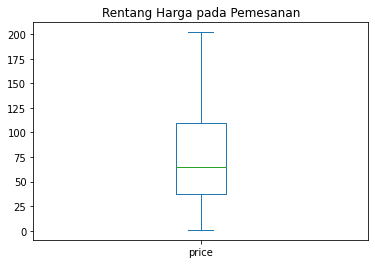

In [ ]:
order_item_price.plot(kind="box", title="Rentang Harga pada Pemesanan")
plt.show()

In [ ]:
order_items.describe()

,index,order_item_id,price
count,112650.000000,112650.000000,112650.000000
mean,56324.500000,1.197834,120.653739
std,32519.398249,0.705124,183.633928
min,0.000000,1.000000,0.850000
25%,28162.250000,1.000000,39.900000
50%,56324.500000,1.000000,74.990000
75%,84486.750000,1.000000,134.900000
max,112649.000000,21.000000,6735.000000


In [ ]:
order_items[order_items["price"] == order_items["price"].max()] 

,index,order_id,order_item_id,product_id,seller_id,price
3556,3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,6735.0


In [ ]:
products.loc[products["product_id"] == "489ae2aa008f021502940f251d4cce7f"]

,index,product_id,product_category_name
5899,5899,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas


In [ ]:
# Ada outlier, dibikin batas dulu
IQR = order_items["price"].quantile(0.75) - order_items["price"].quantile(0.75)

#mencari q3 dari kolom price
q3_price = order_items["price"].quantile(0.75)

batas_atas = q3_price + (1.5 * IQR)
order_items = order_items[order_items["price"] < q3_price*1.5]

order_items

,index,order_id,order_item_id,product_id,seller_id,price
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90
5,5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,21.90
...,...,...,...,...,...,...
112643,112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00
112644,112644,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,119.85
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99


In [ ]:
order_items.describe()

,index,order_item_id,price
count,99302.000000,99302.000000,99302.000000
mean,56295.631266,1.213289,76.450054
std,32538.305914,0.734861,48.814720
min,0.000000,1.000000,0.850000
25%,28141.250000,1.000000,36.900000
50%,56245.500000,1.000000,64.900000
75%,84483.750000,1.000000,109.800000
max,112649.000000,21.000000,202.000000


In [ ]:
#TABLE order_reviews
order_reviews = order_reviews.drop([
    'review_id',
    'review_comment_title',
    'review_comment_message',
    'review_creation_date',
    'review_answer_timestamp'], axis=1)
order_reviews.head()

,index,order_id,review_score
0,0,73fc7af87114b39712e6da79b0a377eb,4
1,1,a548910a1c6147796b98fdf73dbeba33,5
2,2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,3,658677c97b385a9be170737859d3511b,5
4,4,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [ ]:
order_reviews.isnull().sum()

index           0
order_id        0
review_score    0
dtype: int64

In [ ]:
order_reviews[order_reviews.duplicated(keep=False)].head(20)

,index,order_id,review_score


In [ ]:
#TABLE sellers
sellers = sellers.drop([
    'seller_zip_code_prefix'], axis=1)


sellers.head()

,index,seller_id,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP


In [ ]:
sellers.isnull().sum()

index           0
seller_id       0
seller_city     0
seller_state    0
dtype: int64

In [ ]:
#TABLE product_category
product_category.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [ ]:
product_category.isnull().sum()

index                            0
product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
product_category[product_category.duplicated(keep=False)].head(20)

,index,product_category_name,product_category_name_english


In [ ]:
product_category["product_category_name"].unique()

array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

In [ ]:
product_category["product_category_name_english"].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [ ]:
# DATA MANIPULATION
#ganti product_category jadi english
product_category["product_category_name"] = product_category["product_category_name_english"]

In [ ]:
product_category["product_category_name"].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [ ]:
# Menggabungkan tabel-tabel
'''
1. 3 kategori produk dengan omset tertinggi -> products, order_payments, product_category
Products: product_id, product_category_name
order_items: order_id, order_item, product_id
product_category: product_category_name, product_category_name_english
'''

'\n1. 3 kategori produk dengan omset tertinggi -> products, order_payments, product_category\nProducts: product_id, product_category_name\norder_items: order_id, order_item, product_id\nproduct_category: product_category_name, product_category_name_english\n'

In [ ]:
products_merge = pd.merge(product_category, products, on = "product_category_name", how = "inner")
products_order = pd.merge(products_merge,order_items, on = "product_id", how = "inner" )
products_order

,index_x,product_category_name,product_category_name_english,index_y,product_id,index,order_id,order_item_id,seller_id,price
0,19,consoles_games,consoles_games,134,51fed4afb1b41d00ad9d25a73b7fbbc7,5876,0d4a43cf7b7994e0a782864d075dc842,1,f262cbc1c910c83959f849465454ddd3,29.99
1,19,consoles_games,consoles_games,138,70d1bd3a042448105a71d0b41ecbc96b,86329,c41790594db216ff69f55d178ea8c863,1,4c61e37f664c3c88aff092aa5ac779d7,168.99
2,19,consoles_games,consoles_games,235,7207700449f2433076d70a5b1c004eb4,104452,ed4bfa707956ab491448f8f28a48f6c6,1,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90
3,19,consoles_games,consoles_games,235,7207700449f2433076d70a5b1c004eb4,104453,ed4bfa707956ab491448f8f28a48f6c6,2,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90
4,19,consoles_games,consoles_games,235,7207700449f2433076d70a5b1c004eb4,104454,ed4bfa707956ab491448f8f28a48f6c6,3,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90
...,...,...,...,...,...,...,...,...,...,...
6313,65,dvds_blu_ray,dvds_blu_ray,31711,6f19f41a7c7ac7e45f4070d07ed80a75,61645,8c9c6d6fd1d9a3443b23579d99d52e64,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,24.90
6314,65,dvds_blu_ray,dvds_blu_ray,31711,6f19f41a7c7ac7e45f4070d07ed80a75,85546,c253cb678b5c3b8e8c9a13fc97d8e7f5,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,14.90
6315,65,dvds_blu_ray,dvds_blu_ray,31711,6f19f41a7c7ac7e45f4070d07ed80a75,99375,e1621bf755f6bd6cd7a8969768f6b2d6,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,19.90
6316,65,dvds_blu_ray,dvds_blu_ray,32131,e6527bcfddf9f66f0b073cdb2e0df89b,103800,ebb764cf2623a3a2d00b4d06978f16bf,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,19.90


In [ ]:
products_clean = products_order.drop([
    'index_x',
    'product_category_name_english',
    'index_y',
    'index'], axis=1)
products_clean

,product_category_name,product_id,order_id,order_item_id,seller_id,price
0,consoles_games,51fed4afb1b41d00ad9d25a73b7fbbc7,0d4a43cf7b7994e0a782864d075dc842,1,f262cbc1c910c83959f849465454ddd3,29.99
1,consoles_games,70d1bd3a042448105a71d0b41ecbc96b,c41790594db216ff69f55d178ea8c863,1,4c61e37f664c3c88aff092aa5ac779d7,168.99
2,consoles_games,7207700449f2433076d70a5b1c004eb4,ed4bfa707956ab491448f8f28a48f6c6,1,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90
3,consoles_games,7207700449f2433076d70a5b1c004eb4,ed4bfa707956ab491448f8f28a48f6c6,2,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90
4,consoles_games,7207700449f2433076d70a5b1c004eb4,ed4bfa707956ab491448f8f28a48f6c6,3,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90
...,...,...,...,...,...,...
6313,dvds_blu_ray,6f19f41a7c7ac7e45f4070d07ed80a75,8c9c6d6fd1d9a3443b23579d99d52e64,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,24.90
6314,dvds_blu_ray,6f19f41a7c7ac7e45f4070d07ed80a75,c253cb678b5c3b8e8c9a13fc97d8e7f5,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,14.90
6315,dvds_blu_ray,6f19f41a7c7ac7e45f4070d07ed80a75,e1621bf755f6bd6cd7a8969768f6b2d6,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,19.90
6316,dvds_blu_ray,e6527bcfddf9f66f0b073cdb2e0df89b,ebb764cf2623a3a2d00b4d06978f16bf,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,19.90


In [ ]:
products_clean['item_price']= products_clean['order_item_id']*products_clean['price']
products_clean

,product_category_name,product_id,order_id,order_item_id,seller_id,price,item_price
0,consoles_games,51fed4afb1b41d00ad9d25a73b7fbbc7,0d4a43cf7b7994e0a782864d075dc842,1,f262cbc1c910c83959f849465454ddd3,29.99,29.99
1,consoles_games,70d1bd3a042448105a71d0b41ecbc96b,c41790594db216ff69f55d178ea8c863,1,4c61e37f664c3c88aff092aa5ac779d7,168.99,168.99
2,consoles_games,7207700449f2433076d70a5b1c004eb4,ed4bfa707956ab491448f8f28a48f6c6,1,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90,81.90
3,consoles_games,7207700449f2433076d70a5b1c004eb4,ed4bfa707956ab491448f8f28a48f6c6,2,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90,163.80
4,consoles_games,7207700449f2433076d70a5b1c004eb4,ed4bfa707956ab491448f8f28a48f6c6,3,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90,245.70
...,...,...,...,...,...,...,...
6313,dvds_blu_ray,6f19f41a7c7ac7e45f4070d07ed80a75,8c9c6d6fd1d9a3443b23579d99d52e64,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,24.90,24.90
6314,dvds_blu_ray,6f19f41a7c7ac7e45f4070d07ed80a75,c253cb678b5c3b8e8c9a13fc97d8e7f5,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,14.90,14.90
6315,dvds_blu_ray,6f19f41a7c7ac7e45f4070d07ed80a75,e1621bf755f6bd6cd7a8969768f6b2d6,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,19.90,19.90
6316,dvds_blu_ray,e6527bcfddf9f66f0b073cdb2e0df89b,ebb764cf2623a3a2d00b4d06978f16bf,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,19.90,19.90


In [ ]:
products_group = products_clean.groupby(['product_category_name'])['item_price'].sum().sort_values(ascending=False).head()
products_group


product_category_name
cool_stuff        309634.57
pet_shop          167006.61
consoles_games     57076.01
audio              24481.45
market_place       24352.74
Name: item_price, dtype: float64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

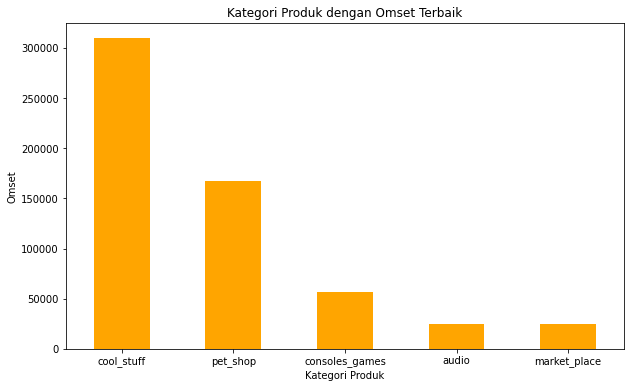

In [ ]:
products_group.plot(kind='bar', title='Kategori Produk dengan Omset Terbaik',
               ylabel='Omset', xlabel='Kategori Produk', figsize=(10, 6), color=['orange'])
plt.xticks(rotation=0)

In [ ]:
'''
2. Kategori roduk dengan review score di atas 4 terbanyak -> products, product_category, order_reviews
Products: product_id, product_category_name
product_category: 	product_category_name, product_category_name_english
order_items : order_id, order_item_id, product_id, seller id, price
order_reviews: order_id, review_score
'''

'\n2. Kategori roduk dengan review score di atas 4 terbanyak -> products, product_category, order_reviews\nProducts: product_id, product_category_name\nproduct_category: \tproduct_category_name, product_category_name_english\norder_items : order_id, order_item_id, product_id, seller id, price\norder_reviews: order_id, review_score\n'

In [ ]:
products_order

,index_x,product_category_name,product_category_name_english,index_y,product_id,index,order_id,order_item_id,seller_id,price
0,19,consoles_games,consoles_games,134,51fed4afb1b41d00ad9d25a73b7fbbc7,5876,0d4a43cf7b7994e0a782864d075dc842,1,f262cbc1c910c83959f849465454ddd3,29.99
1,19,consoles_games,consoles_games,138,70d1bd3a042448105a71d0b41ecbc96b,86329,c41790594db216ff69f55d178ea8c863,1,4c61e37f664c3c88aff092aa5ac779d7,168.99
2,19,consoles_games,consoles_games,235,7207700449f2433076d70a5b1c004eb4,104452,ed4bfa707956ab491448f8f28a48f6c6,1,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90
3,19,consoles_games,consoles_games,235,7207700449f2433076d70a5b1c004eb4,104453,ed4bfa707956ab491448f8f28a48f6c6,2,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90
4,19,consoles_games,consoles_games,235,7207700449f2433076d70a5b1c004eb4,104454,ed4bfa707956ab491448f8f28a48f6c6,3,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90
...,...,...,...,...,...,...,...,...,...,...
6313,65,dvds_blu_ray,dvds_blu_ray,31711,6f19f41a7c7ac7e45f4070d07ed80a75,61645,8c9c6d6fd1d9a3443b23579d99d52e64,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,24.90
6314,65,dvds_blu_ray,dvds_blu_ray,31711,6f19f41a7c7ac7e45f4070d07ed80a75,85546,c253cb678b5c3b8e8c9a13fc97d8e7f5,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,14.90
6315,65,dvds_blu_ray,dvds_blu_ray,31711,6f19f41a7c7ac7e45f4070d07ed80a75,99375,e1621bf755f6bd6cd7a8969768f6b2d6,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,19.90
6316,65,dvds_blu_ray,dvds_blu_ray,32131,e6527bcfddf9f66f0b073cdb2e0df89b,103800,ebb764cf2623a3a2d00b4d06978f16bf,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,19.90


In [ ]:
product_order_review = pd.merge(products_order, order_reviews, on = "order_id", how = "inner")
product_order_review = product_order_review.drop([
    'index_x',
    'index_y'], axis = 1)
product_order_review

<ipython-input-141-3d8cf0146912>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  product_order_review = pd.merge(products_order, order_reviews, on = "order_id", how = "inner")


,product_category_name,product_category_name_english,product_id,order_id,order_item_id,seller_id,price,review_score
0,consoles_games,consoles_games,51fed4afb1b41d00ad9d25a73b7fbbc7,0d4a43cf7b7994e0a782864d075dc842,1,f262cbc1c910c83959f849465454ddd3,29.99,5
1,consoles_games,consoles_games,70d1bd3a042448105a71d0b41ecbc96b,c41790594db216ff69f55d178ea8c863,1,4c61e37f664c3c88aff092aa5ac779d7,168.99,1
2,consoles_games,consoles_games,7207700449f2433076d70a5b1c004eb4,ed4bfa707956ab491448f8f28a48f6c6,1,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90,5
3,consoles_games,consoles_games,7207700449f2433076d70a5b1c004eb4,ed4bfa707956ab491448f8f28a48f6c6,2,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90,5
4,consoles_games,consoles_games,7207700449f2433076d70a5b1c004eb4,ed4bfa707956ab491448f8f28a48f6c6,3,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90,5
...,...,...,...,...,...,...,...,...
6277,dvds_blu_ray,dvds_blu_ray,6f19f41a7c7ac7e45f4070d07ed80a75,8c9c6d6fd1d9a3443b23579d99d52e64,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,24.90,5
6278,dvds_blu_ray,dvds_blu_ray,6f19f41a7c7ac7e45f4070d07ed80a75,c253cb678b5c3b8e8c9a13fc97d8e7f5,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,14.90,4
6279,dvds_blu_ray,dvds_blu_ray,6f19f41a7c7ac7e45f4070d07ed80a75,e1621bf755f6bd6cd7a8969768f6b2d6,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,19.90,4
6280,dvds_blu_ray,dvds_blu_ray,e6527bcfddf9f66f0b073cdb2e0df89b,ebb764cf2623a3a2d00b4d06978f16bf,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,19.90,5


In [ ]:
#Flagging memenuhi score lebih dari 4
product_order_review["review_score"].apply(lambda x: "Terpenuhi" if x >= 4 else "Tidak Terpenuhi" )

0             Terpenuhi
1       Tidak Terpenuhi
2             Terpenuhi
3             Terpenuhi
4             Terpenuhi
             ...       
6277          Terpenuhi
6278          Terpenuhi
6279          Terpenuhi
6280          Terpenuhi
6281    Tidak Terpenuhi
Name: review_score, Length: 6282, dtype: object

In [ ]:
product_order_review["status"] = product_order_review["review_score"].apply(lambda x: 1 if x >= 4 else 0 )
product_order_review
# Terpenuhi = 1, Tidak Terpenuhi = 0

,product_category_name,product_category_name_english,product_id,order_id,order_item_id,seller_id,price,review_score,status
0,consoles_games,consoles_games,51fed4afb1b41d00ad9d25a73b7fbbc7,0d4a43cf7b7994e0a782864d075dc842,1,f262cbc1c910c83959f849465454ddd3,29.99,5,1
1,consoles_games,consoles_games,70d1bd3a042448105a71d0b41ecbc96b,c41790594db216ff69f55d178ea8c863,1,4c61e37f664c3c88aff092aa5ac779d7,168.99,1,0
2,consoles_games,consoles_games,7207700449f2433076d70a5b1c004eb4,ed4bfa707956ab491448f8f28a48f6c6,1,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90,5,1
3,consoles_games,consoles_games,7207700449f2433076d70a5b1c004eb4,ed4bfa707956ab491448f8f28a48f6c6,2,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90,5,1
4,consoles_games,consoles_games,7207700449f2433076d70a5b1c004eb4,ed4bfa707956ab491448f8f28a48f6c6,3,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90,5,1
...,...,...,...,...,...,...,...,...,...
6277,dvds_blu_ray,dvds_blu_ray,6f19f41a7c7ac7e45f4070d07ed80a75,8c9c6d6fd1d9a3443b23579d99d52e64,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,24.90,5,1
6278,dvds_blu_ray,dvds_blu_ray,6f19f41a7c7ac7e45f4070d07ed80a75,c253cb678b5c3b8e8c9a13fc97d8e7f5,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,14.90,4,1
6279,dvds_blu_ray,dvds_blu_ray,6f19f41a7c7ac7e45f4070d07ed80a75,e1621bf755f6bd6cd7a8969768f6b2d6,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,19.90,4,1
6280,dvds_blu_ray,dvds_blu_ray,e6527bcfddf9f66f0b073cdb2e0df89b,ebb764cf2623a3a2d00b4d06978f16bf,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,19.90,5,1


In [ ]:
product_order_review.dtypes

product_category_name             object
product_category_name_english     object
product_id                        object
order_id                          object
order_item_id                      int64
seller_id                         object
price                            float64
review_score                       int64
status                             int64
dtype: object

In [ ]:
# Yang tidak terpenuhi di drop biar gampang
good_review = [1]
product_good_review = product_order_review[product_order_review['status'].isin(good_review)]
product_good_review

,product_category_name,product_category_name_english,product_id,order_id,order_item_id,seller_id,price,review_score,status
0,consoles_games,consoles_games,51fed4afb1b41d00ad9d25a73b7fbbc7,0d4a43cf7b7994e0a782864d075dc842,1,f262cbc1c910c83959f849465454ddd3,29.99,5,1
2,consoles_games,consoles_games,7207700449f2433076d70a5b1c004eb4,ed4bfa707956ab491448f8f28a48f6c6,1,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90,5,1
3,consoles_games,consoles_games,7207700449f2433076d70a5b1c004eb4,ed4bfa707956ab491448f8f28a48f6c6,2,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90,5,1
4,consoles_games,consoles_games,7207700449f2433076d70a5b1c004eb4,ed4bfa707956ab491448f8f28a48f6c6,3,ea65d8b58316a6f2362f2a9e4b3e86ad,81.90,5,1
5,consoles_games,consoles_games,3519403062e217f433e0bbdc52e0b19f,4379c802ba499c2c871ee501a835c33c,1,0432ead42b6c8a0bdf68154add917fdf,39.90,4,1
...,...,...,...,...,...,...,...,...,...
6276,dvds_blu_ray,dvds_blu_ray,65665f545332ae2d0532d676f841163c,081acb555a1113c7c97b5c19a34852a1,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,16.90,5,1
6277,dvds_blu_ray,dvds_blu_ray,6f19f41a7c7ac7e45f4070d07ed80a75,8c9c6d6fd1d9a3443b23579d99d52e64,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,24.90,5,1
6278,dvds_blu_ray,dvds_blu_ray,6f19f41a7c7ac7e45f4070d07ed80a75,c253cb678b5c3b8e8c9a13fc97d8e7f5,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,14.90,4,1
6279,dvds_blu_ray,dvds_blu_ray,6f19f41a7c7ac7e45f4070d07ed80a75,e1621bf755f6bd6cd7a8969768f6b2d6,1,75fbb52eda0cbc24f479d3b2fbfa8d3e,19.90,4,1


In [ ]:
# Group by utk menghitung ada berapa orang yang memberikan review
product_good_review_sort = product_good_review.groupby(["product_category_name"])["review_score"].count().sort_values(ascending=False)
product_good_review_sort

product_category_name
cool_stuff        2301
pet_shop          1423
consoles_games     693
market_place       221
audio              204
dvds_blu_ray        50
la_cuisine           9
Name: review_score, dtype: int64

In [ ]:
#buat dataframe baru
count_review_score = [2301, 1423, 693, 221, 204, 50, 9]
product_cat = ["cool_stuff", "pet_shop", "consoles_games", "market_place", "audio", "dvds_blu_ray", "la_cuisine"]

([<matplotlib.patches.Wedge at 0x7fb1640a9670>,
 [Text(0.10525294304440087, 1.0949528839089344, 'cool_stuff'),
  Text(-0.8266265746800435, -0.7257330818095167, 'pet_shop'),
  Text(0.533225471690618, -0.9621177663572782, 'consoles_games'),
  Text(0.9762855782264558, -0.5068199579209911, 'market_place'),
  Text(1.0766513155989017, -0.225437229887067, 'audio'),
  Text(1.0989551780399431, -0.0479324176231193, 'dvds_blu_ray'),
  Text(1.0999816946437786, -0.006345978931660758, 'la_cuisine')],
 [Text(0.05741069620603683, 0.5972470275866913, '47%'),
  Text(-0.45088722255275093, -0.39585440825973633, '29%'),
  Text(0.2908502572857916, -0.5247915089221517, '14%'),
  Text(0.5325194063053394, -0.276447249775086, '5%'),
  Text(0.5872643539630372, -0.12296576175658198, '4%'),
  Text(0.5994300971126962, -0.026144955067155976, '1%'),
  Text(0.5999900152602429, -0.0034614430536331403, '0%')])

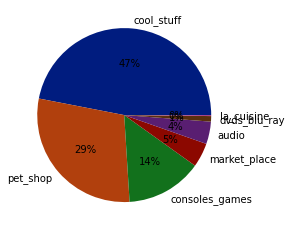

In [ ]:
data = count_review_score
keys = product_cat
palette_color = sns.color_palette('dark')
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')


In [ ]:
'''
3. Dari kategori barang dengan penjualan terbanyak, paling banyak menggunakan payment apa?-> order_payments, order_item, products_item,
order_payments : order_id, payment_type, payment_value 
order_items: order_id, price
'''

'\n3. Dari kategori barang dengan penjualan terbanyak, paling banyak menggunakan payment apa?-> order_payments, order_item\norder_payments : order_id, payment_type, payment_value \norder_items: order_id, price\n'

In [ ]:
best_product_category = "cool_stuff"
df_best_product = products_clean[products_clean.product_category_name == best_product_category]
df_best_product

,product_category_name,product_id,order_id,order_item_id,seller_id,price
1220,cool_stuff,b5cfb1d3c5e435a7a52227e08f220ee7,9edb5899606254447166a651aa65c063,1,4b9750c8ad28220fe6702d4ecb7c898f,49.90
1221,cool_stuff,fdeb34a9f03fea7c3937dd62d1d0287e,5ee987cdf0ab5a1b320bbfae52b39661,1,d66c305afaec317ebee552073a674429,53.90
1222,cool_stuff,575c38b4c88fc7b35ef22fc8312bfe1b,41223ff2c9f99053ad5379603589764b,1,48436dade18ac8b2bce089ec2a041202,138.90
1223,cool_stuff,575c38b4c88fc7b35ef22fc8312bfe1b,5b685c100fca33dd8aabfe1e6fb0d62a,1,48436dade18ac8b2bce089ec2a041202,138.90
1224,cool_stuff,bcd58b852a3b0152b6b384c4e4474ba2,0acce7378714d20548f0f5f1b71f6458,1,8b321bb669392f5163d04c59e235e066,125.00
...,...,...,...,...,...,...
4158,cool_stuff,9ce4603565c839785b24a7e95e28f4eb,9a5d120ae552d50b367cad2bbd87caa0,1,59fb871bf6f4522a87ba567b42dafecf,119.99
4159,cool_stuff,9ce4603565c839785b24a7e95e28f4eb,9a5d120ae552d50b367cad2bbd87caa0,2,59fb871bf6f4522a87ba567b42dafecf,119.99
4160,cool_stuff,9ce4603565c839785b24a7e95e28f4eb,bc7bc14f585b1879f63e89cb0e4cfa17,1,59fb871bf6f4522a87ba567b42dafecf,119.99
4161,cool_stuff,9ce4603565c839785b24a7e95e28f4eb,d7bd9020e0a2758aef0994ea533ee928,1,59fb871bf6f4522a87ba567b42dafecf,119.99


In [ ]:
products_payment = pd.merge(order_payments, df_best_product, on = "order_id", how = "inner")
products_payment

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_id,order_item_id,seller_id,price
0,24,8cd68144cdb62dc0d60848cf8616d2a4,1,boleto,1,330.66,cool_stuff,002af88741ba70c7b5cf4e4a0ad7ef85,1,3a734b715d333a2588a3d54a0c9b8746,39.00
1,24,8cd68144cdb62dc0d60848cf8616d2a4,1,boleto,1,330.66,cool_stuff,002af88741ba70c7b5cf4e4a0ad7ef85,2,3a734b715d333a2588a3d54a0c9b8746,39.00
2,24,8cd68144cdb62dc0d60848cf8616d2a4,1,boleto,1,330.66,cool_stuff,002af88741ba70c7b5cf4e4a0ad7ef85,3,3a734b715d333a2588a3d54a0c9b8746,39.00
3,24,8cd68144cdb62dc0d60848cf8616d2a4,1,boleto,1,330.66,cool_stuff,002af88741ba70c7b5cf4e4a0ad7ef85,4,3a734b715d333a2588a3d54a0c9b8746,39.00
4,24,8cd68144cdb62dc0d60848cf8616d2a4,1,boleto,1,330.66,cool_stuff,002af88741ba70c7b5cf4e4a0ad7ef85,5,3a734b715d333a2588a3d54a0c9b8746,39.00
...,...,...,...,...,...,...,...,...,...,...,...
3099,103623,b38a6a796d97abf00c33609a618732b2,1,credit_card,1,84.52,cool_stuff,7d854ab97c64ef9df2bbfaf332765786,1,aac29b1b99776be73c3049939652091d,59.90
3100,103681,846ddcf1c6b8e75dc7639b3ba919937c,1,credit_card,5,105.87,cool_stuff,dc881ef926ca402063ea142afc83874c,1,7aa4334be125fcdd2ba64b3180029f14,88.00
3101,103710,301c441176beabdc9ef015807d9290aa,1,credit_card,5,109.42,cool_stuff,5657897eec3381c5a9aaf19be83f16e2,1,dbb9b48c841a0e39e21f98e1a6b2ec3e,45.99
3102,103710,301c441176beabdc9ef015807d9290aa,1,credit_card,5,109.42,cool_stuff,5657897eec3381c5a9aaf19be83f16e2,2,dbb9b48c841a0e39e21f98e1a6b2ec3e,45.99


In [ ]:
# Group by utk menghitung ada masing" jumlah payment type
products_payment_sort = products_payment.groupby(["payment_type"])["order_id"].count().sort_values(ascending=False)
products_payment_sort



payment_type
credit_card    2269
boleto          592
voucher         210
debit_card       33
Name: order_id, dtype: int64

In [ ]:
#buat dataframe baru
df_payment = pd.DataFrame({"payment_type" : ["credit_card", "boleto", "voucher", "debit_card"],
                           "count_order" : [2269, 592, 210, 33]})
df_payment

,payment_type,count_order
0,credit_card,2269
1,boleto,592
2,voucher,210
3,debit_card,33


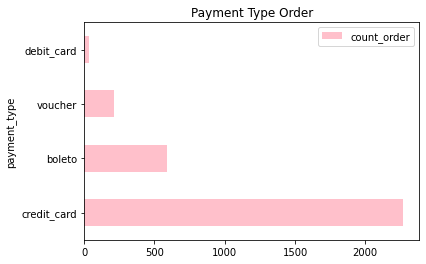

In [ ]:
df_payment.plot.barh(x='payment_type', y='count_order',
             title='Payment Type Order', color='pink')